In [14]:
import os
import glob
import csv

def read_csv(path):
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    filename = csv_files[0]
    
    t, acc, th = [], [], []
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
                t.append(float(row[0]))
                acc.append(float(row[1]))
                th.append(float(row[2]))
                line_count += 1
    return t, acc, th

In [15]:
res = {}
for case in ['allasync', 'async_latencyloss_normal', 'async_random_normal']:
    folder = case + '_res'
    t, acc, th = read_csv(folder)
    res[case] = {}
    res[case]['t'] = t
    res[case]['acc'] = acc
    res[case]['th'] = th

Column names are time, acc, throughput
Column names are time, acc, throughput
Column names are time, acc, throughput


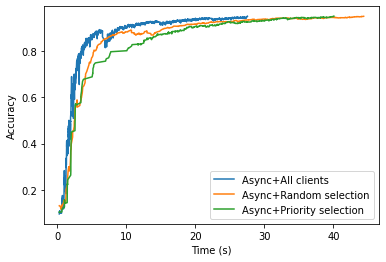

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(res['allasync']['t'], res['allasync']['acc'], label='Async+All clients')
plt.plot(res['async_random_normal']['t'], res['async_random_normal']['acc'], label='Async+Random selection')
plt.plot(res['async_latencyloss_normal']['t'], res['async_latencyloss_normal']['acc'], label='Async+Priority selection')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.savefig('async_acc.png')

Text(0, 0.5, 'Throughput (kB/s)')

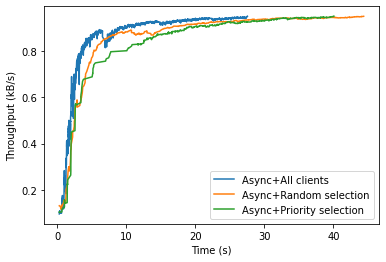

In [18]:
fig = plt.figure()
plt.plot(res['allasync']['t'], res['allasync']['th'], label='Async+All clients')
plt.plot(res['async_random_normal']['t'], res['async_random_normal']['th'], label='Async+Random selection')
plt.plot(res['async_latencyloss_normal']['t'], res['async_latencyloss_normal']['th'], label='Async+Priority selection')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Throughput (kB/s)')